In [1]:
from Node.Node import Control_node
from Plant.Plant import Plant
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

In [4]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.5])
R2 = np.array([0.5])

# Initial behavior
behav_1 = np.array([2.5])
behav_2 = np.array([-1.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    
    control_signal = behavioral_model @ -error
    return control_signal

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate




# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    output = previous_output + error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error




agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

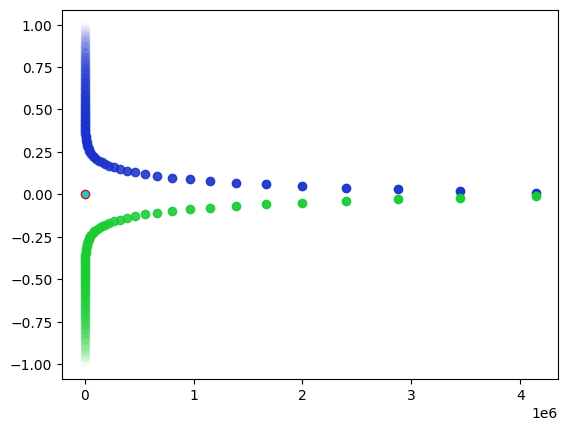

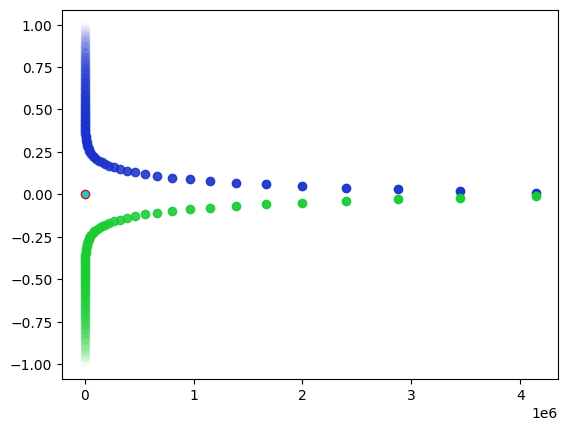

In [5]:
%matplotlib inline
np.random.seed(27)
trials = 100
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c=(0.1,0.8,0.8), edgecolors=[0.8,0.1,0.1])

for t in range(trials):
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())


In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()

In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_control, 'b',label="agent 1")
plt.plot(t, agent2_control, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Control Signals")
plt.show()